<a href="https://colab.research.google.com/github/ShriyaGandotra/Intro-Machine-Learning/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Machine Learning/Assignment 3')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


 Accuracy:   0.8246753246753247
 Precision:  0.7631578947368421
 Recall:     0.6170212765957447
 FI Score:   0.6823529411764706 

 Confusion matrix: 
 [[98  9]
 [18 29]] 



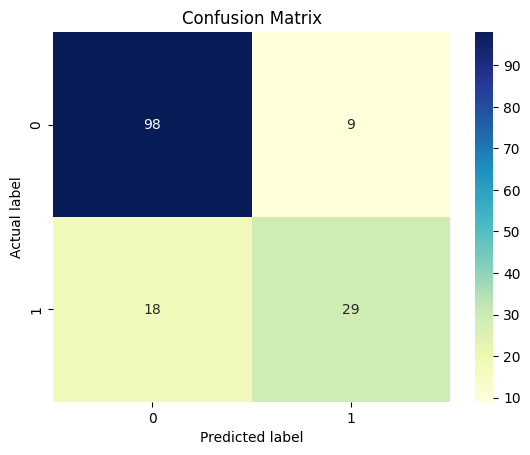

In [ ]:
#---------------------------------- QUESTION 1 --------------------------------#

# Load the diabetes dataset (you may need to replace 'diabetes.csv' with the actual file path)
diabetes_df = pd.read_csv('diabetes.csv')

# Prepare the features (X) and target (Y)
X = diabetes_df.drop('Outcome', axis=1)
Y = diabetes_df['Outcome']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature scaling and standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = classifier.predict(X_test)

# Calculate performance metrics
print("\n","Accuracy:  ", metrics.accuracy_score(Y_test, Y_pred))
print(" Precision: ", metrics.precision_score(Y_test, Y_pred))
print(" Recall:    ", metrics.recall_score(Y_test, Y_pred))
print(" FI Score:  ", metrics.f1_score(Y_test, Y_pred), "\n")

# Plot the confusion matrix
class_names = [0, 1]  # Name of classes (0: No diabetes, 1: Diabetes)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
print(" Confusion matrix: \n", cnf_matrix, "\n")

plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()



 Accuracy:   0.956140350877193
 Precision:  0.9565217391304348
 Recall:     0.9361702127659575
 FI Score:   0.9462365591397849 

 Confusion matrix: 
 [[65  2]
 [ 3 44]] 



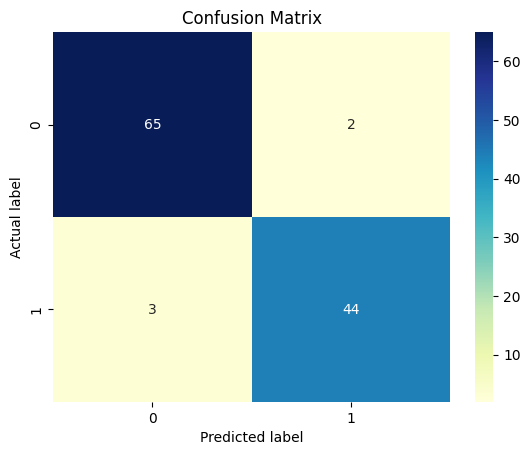



C: 10
Training accuracy: 0.9868131868131869
Test accuracy: 0.9649122807017544
Accuracy: 0.9649122807017544
Precision: 0.9387755102040817
Recall: 0.9787234042553191
F1 Score: 0.9583333333333333

Confusion matrix:
 [[64  3]
 [ 1 46]] 



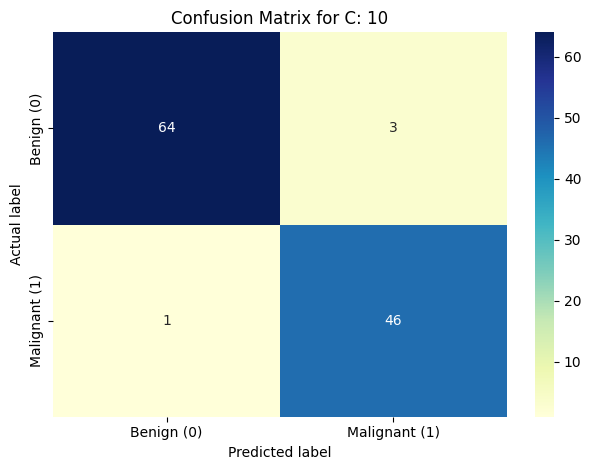





C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849

Confusion matrix:
 [[65  2]
 [ 3 44]] 



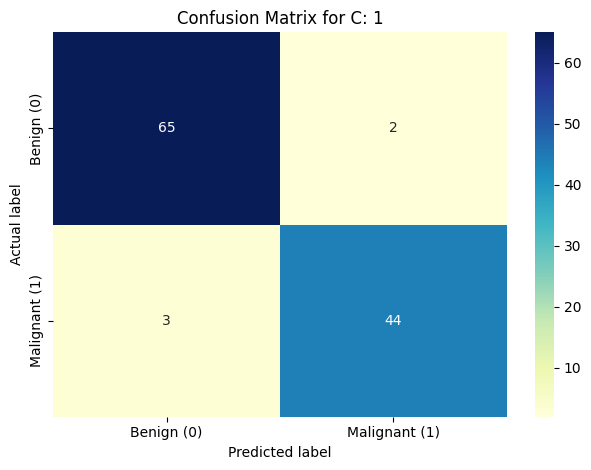





C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158
Accuracy: 0.9736842105263158
Precision: 0.9782608695652174
Recall: 0.9574468085106383
F1 Score: 0.967741935483871

Confusion matrix:
 [[66  1]
 [ 2 45]] 



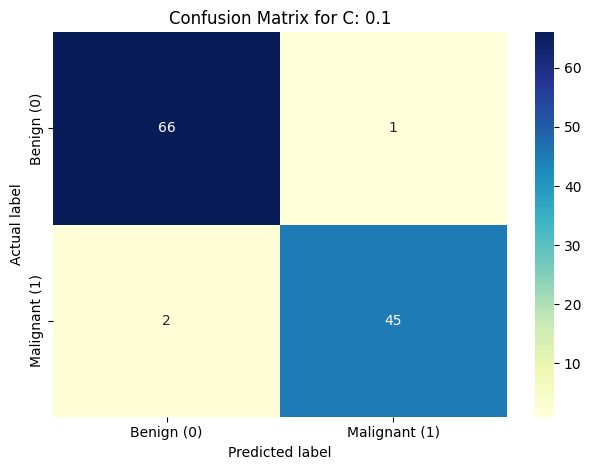

In [13]:
#---------------------------------- QUESTION 2 --------------------------------#
# Load the diabetes dataset (you may need to replace 'diabetes.csv' with the actual file path)
cancer_df = pd.read_csv('cancer.csv')

# List of variables to map
varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the data
cancer_df[varlist] = cancer_df[varlist].apply(binary_map)

# Prepare the features (X) and target (Y)
Xc = cancer_df.iloc[: , 2:31]
Yc = cancer_df.iloc[: , 1]

# Split the data into training (80%) and test (20%) sets
Xc_train, Xc_test, Yc_train, Yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=0)

# Feature scaling and standardization
scaler = StandardScaler()
Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

# Initialize the logistic regression classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(Xc_train, Yc_train)

# Make predictions on the test set
Yc_pred = classifier.predict(Xc_test)

# Calculate performance metrics
print("\n","Accuracy:  ", metrics.accuracy_score(Yc_test, Yc_pred))
print(" Precision: ", metrics.precision_score(Yc_test, Yc_pred))
print(" Recall:    ", metrics.recall_score(Yc_test, Yc_pred))
print(" FI Score:  ", metrics.f1_score(Yc_test, Yc_pred), "\n")

# Plot the confusion matrix
class_names = [0,1]  # Name of classes (0: B, 1: M)
cnf_matrix = confusion_matrix(Yc_test, Yc_pred)
print(" Confusion matrix: \n", cnf_matrix, "\n")

plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

penalties = ['l1']
C_values = [10, 1, 0.1]

for penalty in penalties:
    for c in C_values:
        classifier_reg = LogisticRegression(penalty='l1', C=c, solver='liblinear', random_state=0)

        classifier_reg.fit(Xc_train, Yc_train)
        Yc_pred_reg = classifier_reg.predict(Xc_test)

        # Metrics
        print('\n')
        print('C:', c)
        print('Training accuracy:', classifier_reg.score(Xc_train, Yc_train))
        print('Test accuracy:', classifier_reg.score(Xc_test, Yc_test))
        print('Accuracy:', metrics.accuracy_score(Yc_test, Yc_pred_reg))
        print('Precision:', metrics.precision_score(Yc_test, Yc_pred_reg))
        print('Recall:', metrics.recall_score(Yc_test, Yc_pred_reg))
        print('F1 Score:', metrics.f1_score(Yc_test, Yc_pred_reg))

        # Confusion Matrix
        cnf_matrix = confusion_matrix(Yc_test, Yc_pred_reg)
        print("\nConfusion matrix:\n", cnf_matrix , '\n')

        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
        plt.title(f'Confusion Matrix for C: {c}')
        plt.xlabel('Predicted label')
        plt.ylabel('Actual label')
        plt.tight_layout()
        plt.show()

        print('\n')



 Accuracy:   0.9122807017543859
 Precision:  0.8936170212765957
 Recall:     0.8936170212765957
 FI Score:   0.8936170212765957 

 Confusion matrix: 
 [[62  5]
 [ 5 42]] 



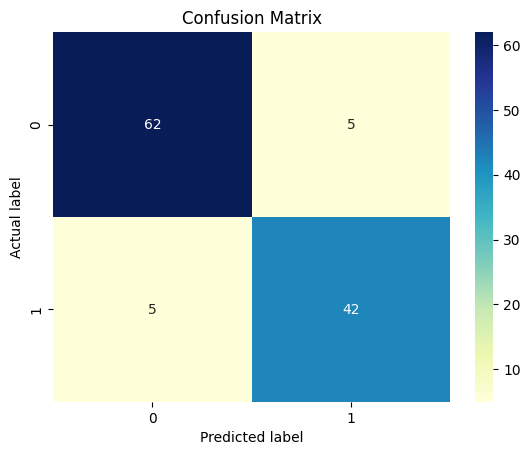

In [18]:
#---------------------------------- QUESTION 3 --------------------------------#
# Initialize the Naive Bayesian classifier
classifier = GaussianNB()
classifier.fit(Xc_train, Yc_train)

# Make predictions on the test set
Y_pred_NB = classifier.predict(Xc_test)

# Calculate performance metrics
print("\n","Accuracy:  ", metrics.accuracy_score(Yc_test, Y_pred_NB))
print(" Precision: ", metrics.precision_score(Yc_test, Y_pred_NB))
print(" Recall:    ", metrics.recall_score(Yc_test, Y_pred_NB))
print(" FI Score:  ", metrics.f1_score(Yc_test, Y_pred_NB), "\n")

# Plot the confusion matrix
class_names = [0, 1]  # Name of classes (0: B, 1: M)
cnf_matrix_NB = confusion_matrix(Yc_test, Y_pred_NB)
print(" Confusion matrix: \n", cnf_matrix_NB, "\n")

plt.figure()
sns.heatmap(pd.DataFrame(cnf_matrix_NB), annot=True, cmap="YlGnBu", fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


Best K: 14
Best Accuracy: 0.9649122807017544
Best Precision: 0.9574468085106383
Best Recall: 0.9574468085106383
Best FI: 0.9574468085106385




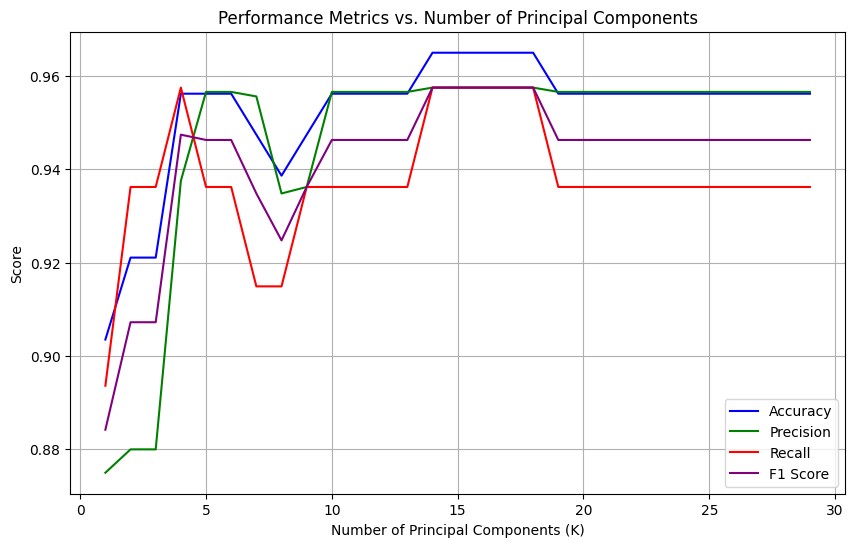

In [19]:
#---------------------------------- QUESTION 4 --------------------------------#
# Load the diabetes dataset (you may need to replace 'diabetes.csv' with the actual file path)
cancer_df = pd.read_csv('cancer.csv')

# List of variables to map
varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the data
cancer_df[varlist] = cancer_df[varlist].apply(binary_map)

# Prepare the features (X) and target (Y)
X = cancer_df.iloc[: , 2:31]
Y = cancer_df.iloc[: , 1]

# Split the data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature scaling and standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store performance metrics for different Ks
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Range of K values to test
max_k = min(Xc_train.shape)
for k in range(1, max_k + 1):
    # Perform PCA with K components
    pca = PCA(n_components=k)
    Xc_train_pca = pca.fit_transform(Xc_train)
    Xc_test_pca = pca.transform(Xc_test)

    # Initialize and train the logistic regression classifier
    classifier = LogisticRegression(random_state=0)
    classifier.fit(Xc_train_pca, Yc_train)

    # Make predictions on the test set
    Y_pred_LR = classifier.predict(Xc_test_pca)

    # Calculate performance metrics
    accuracy = metrics.accuracy_score(Yc_test, Y_pred_LR)
    precision = metrics.precision_score(Yc_test, Y_pred_LR)
    recall = metrics.recall_score(Yc_test, Y_pred_LR)
    f1 = metrics.f1_score(Yc_test, Y_pred_LR)

    # Append results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the K value that achieves the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
best_Precision = max(precision_scores)
best_Recall = max(recall_scores)
best_FIscore = max(f1_scores)

# Plot the performance metrics over different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, linestyle='-', color='b', label='Accuracy')
plt.plot(k_values, precision_scores, linestyle='-', color='g', label='Precision')
plt.plot(k_values, recall_scores, linestyle='-', color='r', label='Recall')
plt.plot(k_values, f1_scores, linestyle='-', color='purple', label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Principal Components')
plt.legend()
plt.grid(True)

# Print the best K value and corresponding accuracy
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Precision: {best_Precision}")
print(f"Best Recall: {best_Recall}")
print(f"Best FI: {best_FIscore}")
print("\n")


plt.show()



Best K: 5
Best Accuracy: 0.9298245614035088
Best Precision: 0.9574468085106383
Best Recall: 0.9574468085106383
Best FI: 0.9574468085106385




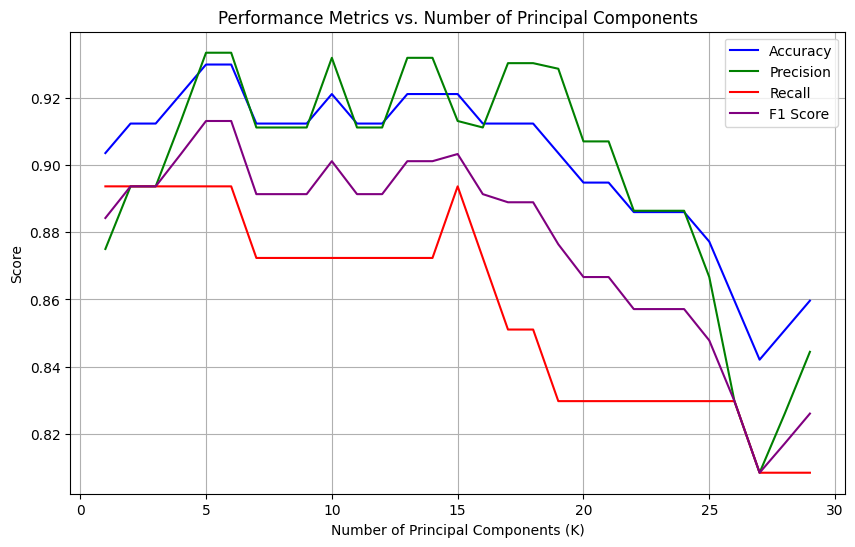

In [ ]:
#---------------------------------- QUESTION 5 --------------------------------#
# Load the diabetes dataset (you may need to replace 'diabetes.csv' with the actual file path)
cancer_df = pd.read_csv('cancer.csv')

# List of variables to map
varlist =  ['diagnosis']

# Defining the map function
def binary_map(x):
    return x.map({'M': 1, 'B': 0})

# Applying the function to the data
cancer_df[varlist] = cancer_df[varlist].apply(binary_map)

# Prepare the features (X) and target (Y)
X = cancer_df.iloc[: , 2:31]
Y = cancer_df.iloc[: , 1]

# Split the data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Feature scaling and standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize lists to store performance metrics for different Ks
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Range of K values to test
max_k = min(X_train.shape)
for k in range(1, max_k + 1):
    # Perform PCA with K components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Initialize the Naive Bayesian classifier
    classifier = GaussianNB()
    classifier.fit(X_train_pca, Y_train)

    # Make predictions on the test set
    Y_pred = classifier.predict(X_test_pca)

    # Calculate performance metrics
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1 = metrics.f1_score(Y_test, Y_pred)

    # Append results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the K value that achieves the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

# Plot the performance metrics over different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, linestyle='-', color='b', label='Accuracy')
plt.plot(k_values, precision_scores, linestyle='-', color='g', label='Precision')
plt.plot(k_values, recall_scores, linestyle='-', color='r', label='Recall')
plt.plot(k_values, f1_scores, linestyle='-', color='purple', label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Principal Components')
plt.legend()
plt.grid(True)

# Print the best K value and corresponding accuracy
print(f"Best K: {best_k}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Precision: {best_Precision}")
print(f"Best Recall: {best_Recall}")
print(f"Best FI: {best_FIscore}")
print("\n")

plt.show()